---
format:
  html:
    code-fold: true
execute:
  warning: false
---

# EDA and Munging

In this section, we will explore a few different aspects of our dataset. We will examine the different categories and values that exist within the data, as well as the distributions for various sub-categorizations. This analysis will help contextualize which attributes of the data are most useful for addressing our areas of interest.

## About the Data

## Import

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [49]:
with open("../data/data.csv", "r") as f:
    df = pd.read_csv(f)
    df["Date"] = pd.to_datetime(df["Date"])
df.head()

/var/folders/wc/9wclntk940q3y52dpvt1g_s80000gn/T/ipykernel_6051/3650102073.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


,Level,Category,Variable,County,Date,GEOID,State FIPS,State,Value,Denominator,Denominator Description,Row-ID,Latitude,Longitude,Location,Year
0,County,Airports,Total Airports,"Grant County, Wisconsin",2020-01-01,55043,55,Wisconsin,9.0,9.0,Total Airports,airports-2020-55043,42.867479,-90.706205,POINT (-90.706205 42.867479),2020
1,County,Airports,Total Airports,"Taylor County, Florida",2020-01-01,12123,12,Florida,7.0,7.0,Total Airports,airports-2020-12123,30.047015,-83.603520,POINT (-83.60352 30.047015),2020
2,County,Airports,Total Airports,"Stephens County, Texas",2020-01-01,48429,48,Texas,2.0,2.0,Total Airports,airports-2020-48429,32.735872,-98.836184,POINT (-98.836184 32.735872),2020
3,County,Airports,Other airports,"Knox County, Maine",2020-01-01,23013,23,Maine,7.0,9.0,Total Airports,other-airports-2020-23013,44.155975,-69.234045,POINT (-69.234045 44.155975),2020
4,County,Airports,Primary Airports,"Colfax County, New Mexico",2020-01-01,35007,35,New Mexico,0.0,5.0,Total Airports,primary-airports-2020-35007,36.606139,-104.646840,POINT (-104.64684 36.606139),2020


## Groupings

1. Categories

In [50]:
cats = list(df["Category"].unique())


In [51]:
catVars = {}
for cat in cats:
    if cat not in catVars:
        catVars[cat] = []
    
    for var in df[df["Category"] == cat]["Variable"].unique():
        catVars[cat].append(var)

catVarDf = []
for i in range(max(len(catVars[k]) for k in catVars)):
    catVarDf.append([])
    for k in catVars:
        try:
            catVarDf[-1].append(catVars[k][i])
        except Exception as e:
            catVarDf[-1].append(" ")
table = tabulate(catVarDf, headers=list(catVars.keys()))
print(table)

Airports                      Bridges                            Business        Commuting                         Demographics              Maritime    Person trips                              Railroad
----------------------------  ---------------------------------  --------------  --------------------------------  ------------------------  ----------  ----------------------------------------  --------------------
Total Airports                Bridges, poor                      Establishments  Workers                           Population                Marinas     Trips 1-3 miles                           Rail freight miles
Other airports                Bridges, fair                      Employees       Commute by car/ truck/van         Hispanic                  Docks       Trips less than 1 mile                    Rail passenger miles
Primary Airports              Total bridges                                      Work at home                      Median Household Income            

TALK ABOUT WHICH CATEGORIES ARE INTERESTING

# Dates

In [52]:
sorted(list(df["Date"].unique()))

[Timestamp('2014-01-01 00:00:00'),
 Timestamp('2015-01-01 00:00:00'),
 Timestamp('2016-01-01 00:00:00'),
 Timestamp('2017-01-01 00:00:00'),
 Timestamp('2018-01-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00')]

In [53]:
sorted(list(df["Year"].unique()))

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

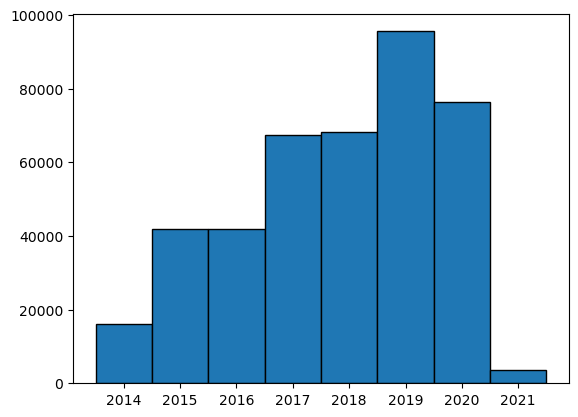

In [54]:
bins = [i + 0.5 for i in range(2013, 2022)]
labs = [str(i) for i in range(2013, 2022)]

plt.hist(df["Year"], bins = bins, edgecolor = "black")
plt.show()

# Locations

In [55]:
states = sorted(list(df["State"].unique()))
len(states)

56

In [56]:
counties = sorted(list(df["County"].unique()))
len(counties)

3233

## Pare Down Dataset

In [57]:
df["Level"].unique()

array(['County'], dtype=object)

#### 1. Reduce the Amount of Data

In [89]:
cleaned = df[df["Category"].isin(["Bridges", "Business", "Commuting", "Demographics", "Person trips"])].copy()
cleaned.drop(columns = ["Row-ID","Level","Date","State FIPS","Denominator","Denominator Description"], inplace = True)
cleaned.head()

,Category,Variable,County,GEOID,State,Value,Latitude,Longitude,Location,Year
16165,Bridges,"Bridges, poor","Greeley County, Nebraska",31077,Nebraska,10.0,41.567444,-98.521218,POINT (-98.521218 41.567444),2018
16166,Bridges,"Bridges, fair","Lewis County, Missouri",29111,Missouri,72.0,40.096875,-91.722106,POINT (-91.722106 40.096875),2017
16167,Bridges,"Bridges, fair","Knox County, Ohio",39083,Ohio,107.0,40.398760,-82.421514,POINT (-82.421514 40.39876),2018
16168,Bridges,Total bridges,"Harnett County, North Carolina",37085,North Carolina,135.0,35.368633,-78.869415,POINT (-78.869415 35.368633),2017
16169,Bridges,Total bridges,"Gem County, Idaho",16045,Idaho,56.0,43.979330,-116.432524,POINT (-116.432524 43.97933),2017


#### 2. Add Categories to Variable Descriptors

In [90]:
def addCategory(cat,var):
    return f"{cat}_{var}"
cleaned["Variable"] = cleaned.apply(lambda row: addCategory(row['Category'], row['Variable']), axis=1)
cleaned.drop(columns = ["Category"], inplace = True)
cleaned.head()

,Variable,County,GEOID,State,Value,Latitude,Longitude,Location,Year
16165,"Bridges_Bridges, poor","Greeley County, Nebraska",31077,Nebraska,10.0,41.567444,-98.521218,POINT (-98.521218 41.567444),2018
16166,"Bridges_Bridges, fair","Lewis County, Missouri",29111,Missouri,72.0,40.096875,-91.722106,POINT (-91.722106 40.096875),2017
16167,"Bridges_Bridges, fair","Knox County, Ohio",39083,Ohio,107.0,40.398760,-82.421514,POINT (-82.421514 40.39876),2018
16168,Bridges_Total bridges,"Harnett County, North Carolina",37085,North Carolina,135.0,35.368633,-78.869415,POINT (-78.869415 35.368633),2017
16169,Bridges_Total bridges,"Gem County, Idaho",16045,Idaho,56.0,43.979330,-116.432524,POINT (-116.432524 43.97933),2017


#### 3. Remove state names from county names

In [91]:
def dropStateFromCounty(county):
    if county != "District of Columbia":
        return county.split(",")[0]
    return county

cleaned["County"] = cleaned["County"].apply(dropStateFromCounty)
cleaned.head()

,Variable,County,GEOID,State,Value,Latitude,Longitude,Location,Year
16165,"Bridges_Bridges, poor",Greeley County,31077,Nebraska,10.0,41.567444,-98.521218,POINT (-98.521218 41.567444),2018
16166,"Bridges_Bridges, fair",Lewis County,29111,Missouri,72.0,40.096875,-91.722106,POINT (-91.722106 40.096875),2017
16167,"Bridges_Bridges, fair",Knox County,39083,Ohio,107.0,40.398760,-82.421514,POINT (-82.421514 40.39876),2018
16168,Bridges_Total bridges,Harnett County,37085,North Carolina,135.0,35.368633,-78.869415,POINT (-78.869415 35.368633),2017
16169,Bridges_Total bridges,Gem County,16045,Idaho,56.0,43.979330,-116.432524,POINT (-116.432524 43.97933),2017


#### 4. Add state abbreviation and remove territories

In [92]:
state_dict = {
    'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA',
    'Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA',
    'Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS',
    'Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA',
    'Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT',
    'Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM',
    'New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK',
    'Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD',
    'Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','Washington': 'WA',
    'West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY','District of Columbia':"DC"
}
cleaned = cleaned[cleaned["State"].isin(state_dict)]
cleaned["StateAbbv"] = [state_dict[s] for s in cleaned["State"]]
cleaned.head()

,Variable,County,GEOID,State,Value,Latitude,Longitude,Location,Year,StateAbbv
16165,"Bridges_Bridges, poor",Greeley County,31077,Nebraska,10.0,41.567444,-98.521218,POINT (-98.521218 41.567444),2018,NE
16166,"Bridges_Bridges, fair",Lewis County,29111,Missouri,72.0,40.096875,-91.722106,POINT (-91.722106 40.096875),2017,MO
16167,"Bridges_Bridges, fair",Knox County,39083,Ohio,107.0,40.398760,-82.421514,POINT (-82.421514 40.39876),2018,OH
16168,Bridges_Total bridges,Harnett County,37085,North Carolina,135.0,35.368633,-78.869415,POINT (-78.869415 35.368633),2017,NC
16169,Bridges_Total bridges,Gem County,16045,Idaho,56.0,43.979330,-116.432524,POINT (-116.432524 43.97933),2017,ID


#### 5. Pivot Data to have variables as columns

In [93]:
cleaned = cleaned.pivot(index=[c for c in cleaned.columns if c not in ["Variable","Value"]], columns=["Variable"], values="Value")
cleaned.reset_index(inplace = True)
# cleaned.fillna(0, inplace = True)
cleaned.to_csv("../data/cleaned.csv", index = False)
cleaned.head()

Variable,County,GEOID,State,Latitude,Longitude,Location,Year,StateAbbv,Bridges_Bridge area (square meters),"Bridges_Bridge area, fair (square meters)",...,Person trips_Trips 1-3 miles,Person trips_Trips 10-25 miles,Person trips_Trips 100-250 miles,Person trips_Trips 25-50 miles,Person trips_Trips 250-500 miles,Person trips_Trips 3-5 miles,Person trips_Trips 5-10 miles,Person trips_Trips 50-100 miles,Person trips_Trips greater than or equal to 500 miles,Person trips_Trips less than 1 mile
0,Abbeville County,45001,South Carolina,34.222593,-82.459165,POINT (-82.459165 34.222593),2014,SC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abbeville County,45001,South Carolina,34.222593,-82.459165,POINT (-82.459165 34.222593),2015,SC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abbeville County,45001,South Carolina,34.222593,-82.459165,POINT (-82.459165 34.222593),2016,SC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abbeville County,45001,South Carolina,34.222593,-82.459165,POINT (-82.459165 34.222593),2017,SC,64177.63,22864.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abbeville County,45001,South Carolina,34.222593,-82.459165,POINT (-82.459165 34.222593),2018,SC,73924.01,34151.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
